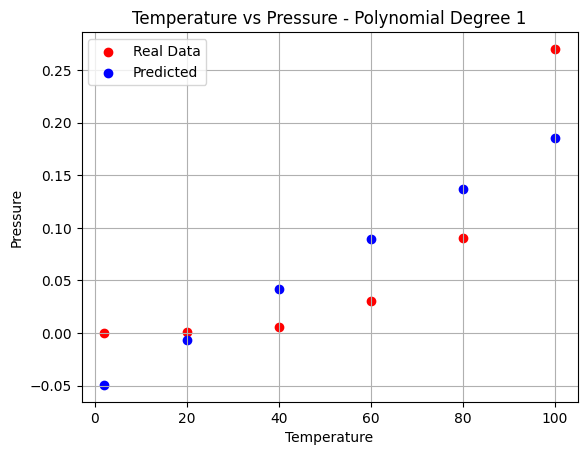

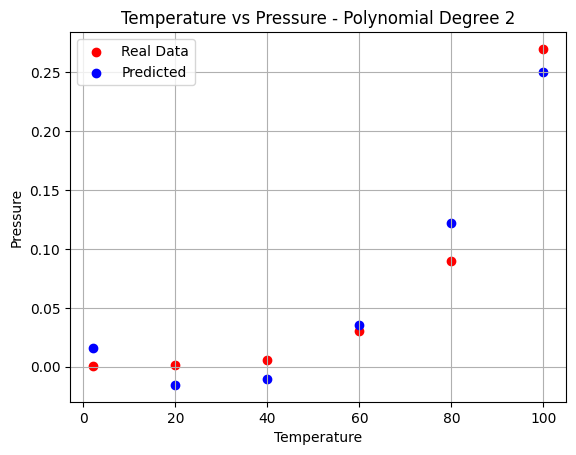

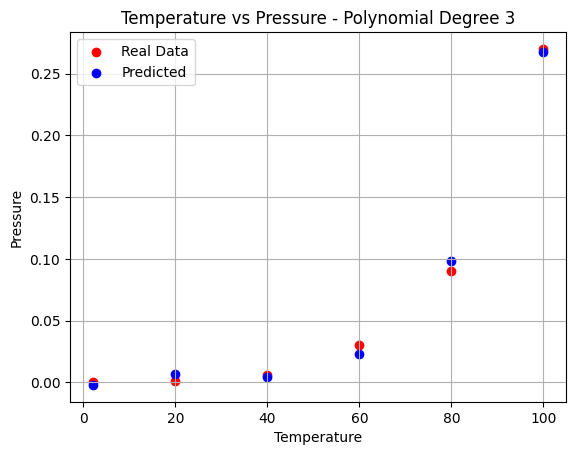

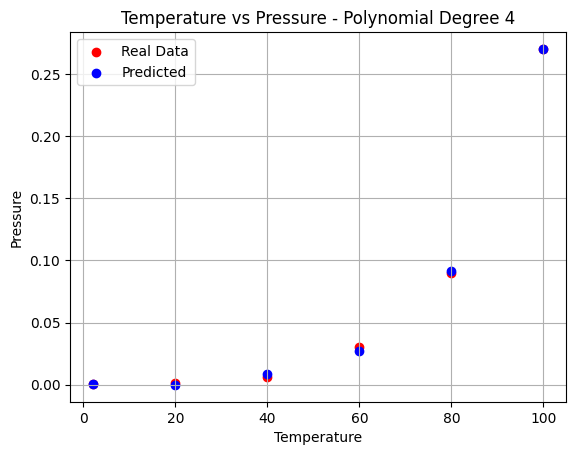

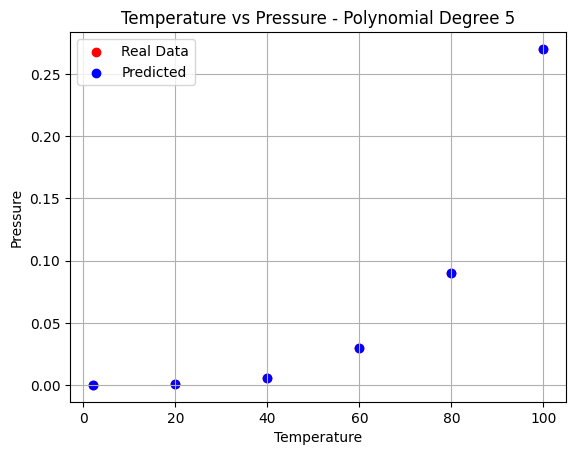

In [49]:
# Try different degrees
degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    polyreg = PolynomialFeatures(degree=degree)
    X_poly = polyreg.fit_transform(temperature)  # Transforming the input data into polynomial features
    linreg = LinearRegression()
    linreg.fit(X_poly, preasure)  # Fitting the model with the transformed data
    predicted_preasure = linreg.predict(X_poly)  # Predicting the output with the transformed input data

    # Visualizing the results
    plt.scatter(temperature, preasure, color='red')
    plt.scatter(temperature, predicted_preasure, color='blue')
    plt.title(f'Temperature vs Pressure - Polynomial Degree {degree}')
    plt.xlabel('Temperature')
    plt.ylabel('Pressure')
    plt.legend(['Real Data', 'Predicted'])
    plt.grid()
    plt.show() 

In [53]:
import pandas as pd

df = pd.read_csv("auto_mpg.csv")
print(df.columns)


Index(['18.0   8   307.0      130.0      3504.      12.0   70  1\t"chevrolet chevelle malibu"'], dtype='object')


In [55]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv("auto_mpg.csv", delim_whitespace=True, names=column_names)


C:\Users\Asus\AppData\Local\Temp\ipykernel_26072\2717533939.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("auto_mpg.csv", delim_whitespace=True, names=column_names)


In [57]:
import pandas as pd

# Define column names based on the dataset structure
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower',
                'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# Read the data using whitespace as the delimiter
df = pd.read_csv('auto_mpg.csv', delim_whitespace=True, names=column_names)

# Confirm by printing first 5 rows
print(df.head())


    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


C:\Users\Asus\AppData\Local\Temp\ipykernel_26072\1570348091.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('auto_mpg.csv', delim_whitespace=True, names=column_names)


C:\Users\Asus\AppData\Local\Temp\ipykernel_26072\4085108978.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace('?', np.nan, inplace=True)


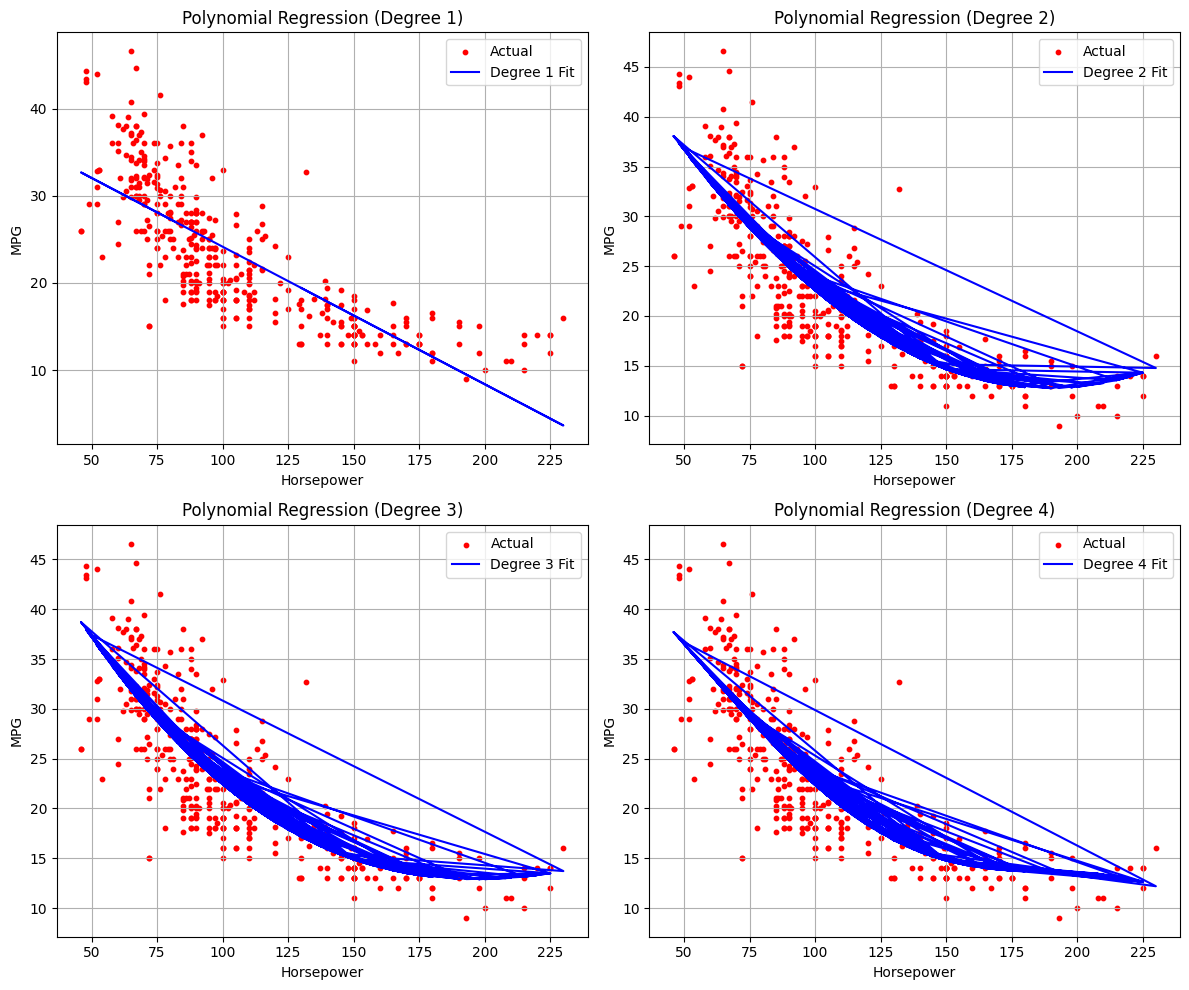

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Clean horsepower column (already handled, but just in case)
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], inplace=True)
df['horsepower'] = df['horsepower'].astype(float)

# Input and output
X = df[['horsepower']].values
y = df['mpg'].values

# Polynomial regression for degrees 1 to 4
degrees = [1, 2, 3, 4]

plt.figure(figsize=(12, 10))
for i, degree in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)

    plt.subplot(2, 2, i)
    plt.scatter(X, y, color='red', s=10, label='Actual')
    plt.plot(X, y_pred, color='blue', label=f'Degree {degree} Fit')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
